# Tutorial 2

## Modulation and Matched-Filter Receiver

In [1]:
import numpy as np  # make the numpy package available and use 'np' as alias
import matplotlib.pyplot as plt  # plotting library
%matplotlib inline
YOUR_CODE_HERE = None  # placeholder

### Exercise 1
Implement a BPSK modulator

#### a) Generate random bits
Generate 42 random bits with equal probability for a 0 or a 1.  Use `numpy.random.default_rng().choice` for this!

In [2]:
nbits = 42
rng = np.random.default_rng()
bits = YOUR_CODE_HERE
bits = rng.choice([0,1],nbits)

print(bits) # print bits
print(np.sum(bits)/nbits) # print fraction of bits that are 1

[1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0
 1 0 1 0 1]
0.5


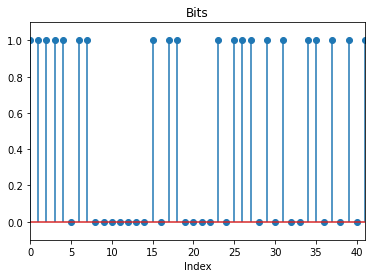

In [3]:
plt.stem(bits)
plt.title("Bits")
plt.xlabel("Index")
plt.margins(y=0.1, x=0);

#### b) Convert bits to BPSK symbols
Assign the bits in the following way: logical 0 -> -1, logical 1 -> 1

In [4]:
symbols = YOUR_CODE_HERE
symbols = 2 * bits - 1

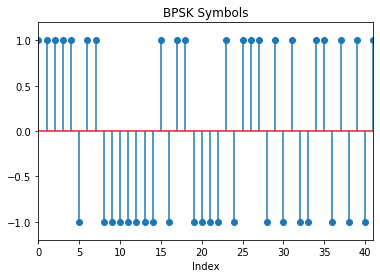

In [5]:
plt.stem(symbols)
plt.title("BPSK Symbols")
plt.xlabel("Index")
plt.margins(y=0.1, x=0);

#### c) Pulse shaping
Use the given RRC-filter for the pulse shaping. Don't forget that `g` is upsampled by sps compared to your bitstream. 

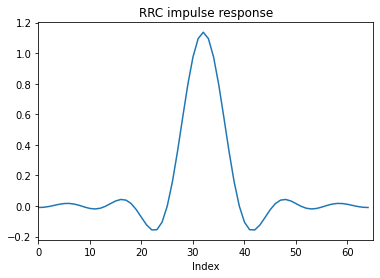

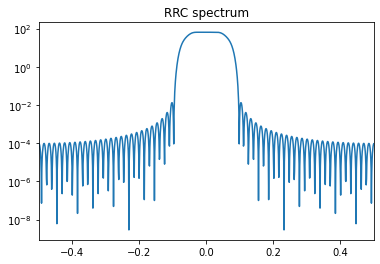

In [15]:
import rrc  # requires rrc.py to be accessible (e.g., in the same directory)
sps = 8  # samples per symbol
K = 8  # length of the impulse response in symbols
rho = 0.5  # RRC rolloff factor
g = rrc.get_rrc_ir(K * sps + 1, sps, 1, rho)  # RRC impulse response

plt.plot(g)
plt.title("RRC impulse response")
plt.xlabel("Index")
plt.xlim(0, K * sps + 1)

plt.figure()
nfft = 1024
f = np.linspace(-0.5, 0.5, nfft)
G = np.abs(np.fft.fftshift(np.fft.fft(np.concatenate((g, np.zeros(nfft-g.size))))))**2
plt.semilogy(f, G)
plt.title("RRC spectrum")
plt.xlim(-0.5, 0.5);

In [9]:
s_BB = YOUR_CODE_HERE
s_BB = np.zeros(sps*nbits+ g.size -1)
for b in range(nbits):
    s_BB[b*sps:b*sps+g.size] += bits[b]*g

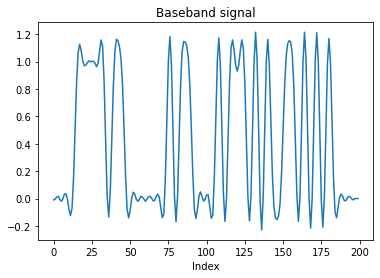

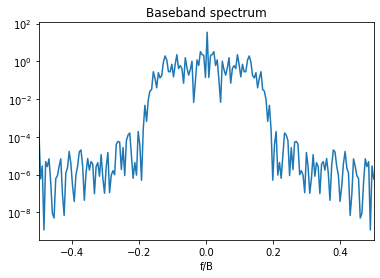

In [10]:
plt.plot(s_BB)
plt.title("Baseband signal")
plt.xlabel("Index")

plt.figure()
f = np.linspace(-0.5, 0.5, s_BB.size)
S_BB = np.abs(np.fft.fftshift(np.fft.fft(s_BB)))**2/s_BB.size
plt.semilogy(f, S_BB)
plt.xlim(-0.5, 0.5)
plt.xlabel("f/B")
plt.title("Baseband spectrum");

#### d) Theoretical questions
1. How does your choice of `K` (length of the impulse response in symbols) affect the spectrum and why?
2. Which pros and cons does a large `K` offer?
3. What effect does the choice of `sps` (samples per symbol) have on the spectrum and why?

### Exercise 2
Implement a Matched-filter receiver for the BPSK modulator you created in exercise 1!

#### a) Determine the Matched-filter for the modulator from question 1! 

In [ ]:
g_MF = YOUR_CODE_HERE

#### b) Apply the matched filter to the Baseband signal `s_BB`! 

In [ ]:
y = YOUR_CODE_HERE

In [ ]:
plt.plot(y)
plt.title("Baseband signal after Matched Filtering")
plt.xlabel("Index")
plt.xlim(0, y.size)

plt.figure()
f = np.linspace(-0.5, 0.5, y.size)
Y = np.abs(np.fft.fftshift(np.fft.fft(y)))**2/y.size
plt.semilogy(f, Y)
plt.xlim(-0.5, 0.5)
plt.title("Baseband spectrum after Matched Filtering");

#### c) In order to reconstruct the BPSK symbols, sample `y`.  *Note*:  Look at the initial delay

In [ ]:
recv_symbols = YOUR_CODE_HERE

In [ ]:
plt.stem(recv_symbols)
plt.title("Received BPSK symbols")
plt.margins(y=0.1, x=0)
plt.xlabel("Index");

#### d) Reconstruct the transmitted bitstream!

In [ ]:
recv_bits = YOUR_CODE_HERE

In [ ]:
if (recv_bits == bits).all():
    print("Transmission successful!")
else:
    print("Error(s) occurred!")

### Theoretical questions
1. What causes the delay in the filtered baseband signal?
2. What effect would a receive filter that is not "matched" have?